## Exploratory Data Analysis (EDA) of "Titanic : The Ship that Sinked"

#### EDA or Exploratory Data Analysis is the brainstorming stage of Machine Learning. It is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. It's very important for a data scientist to be able to understand the nature of the data without making assumptions.
#### The purpose of EDA is to use summary statistics and visualizations to better understand data, and find clues about the tendencies (the patterns and trends in the data) of the data, its quality and to formulate assumptions and the hypothesis of our analysis. At this stage, all the useful insights are drawn and correlations between the variables are understood.
#### EDA or Exploratory Data Analysis is an approach for summarizing, visualizing, and becoming intimately familiar with the important characteristics of a data set.

#### The main objective is to cover how to:
#### 1. Read and examine a dataset and classify variables by their type: Quantitative vs. Categorical
#### 2. Handle categorical variables with numerically coded values
#### 3. Perform univariate and bivariate analysis and derive meaningful insights about the dataset
#### 4. Identify and treat missing values and remove dataset outliers
#### 5. Build a correlation matrix to identify relevant variables

#### The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.
#### On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
#### One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

### Content

#### survival Survival :   0 = No, 1 = Yes
#### pclass Ticket class :  1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)
#### sex : M (Male), F (Female)
#### Age :  Age in years (Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5)
#### sibsp :  of siblings / spouses aboard the Titanic ( The dataset defines family relations in this way...)
#### parch :  of parents / children aboard the Titanic (The dataset defines family relations in this way...) 
####                (Parent = mother, father Child=daughter, son, stepdaughter, stepson. Some children travelled only with a nanny,therefore parch=0 for them.)
#### ticket :  Ticket number
#### fare :  Passenger fare
#### cabin :  Cabin number
#### embarked :  Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampto

## Import the Required Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

## Read the Data

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.shape

# (no of rows , no of column)

(891, 12)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Lets check the data type

In [6]:
titanic.dtypes

## int64 means discrete data
## float64 means continous data
## object means categorical data

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
titanic.info()

# summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## Total Unique Value

In [9]:
titanic.nunique()

# gives only unique values

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Let's check the summary of data

In [10]:
titanic.describe().T

# statsticall data (statsics)
# by defult showimg only numerical variables doesnt show categorical

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
titanic.describe(include='object').T

## categorial data
## top = mode
## freq = no of mode occur

,count,unique,top,freq
Name,891,891,"Ilett, Miss. Bertha",1
Sex,891,2,male,577
Ticket,891,681,CA. 2343,7
Cabin,204,147,C23 C25 C27,4
Embarked,889,3,S,644


In [12]:
titanic.describe(include='all').T

## all data statsical and catagorical
## NaN = dont have any meaning in that columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Ilett, Miss. Bertha",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,CA. 2343,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


## Missing Value Imputation

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### The Embarked feature has only 2 missing values, which can easily be filled. 
#### It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. 
#### The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

## Data Visualizing

### Univariate Analysis

Text(0.5, 1.0, 'Count Plot')

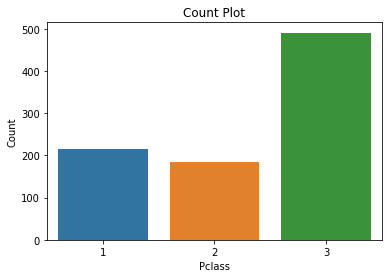

In [14]:
sns.countplot(x = 'Pclass', data = titanic)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Count Plot')

Text(0.5, 1.0, 'Count Plot')

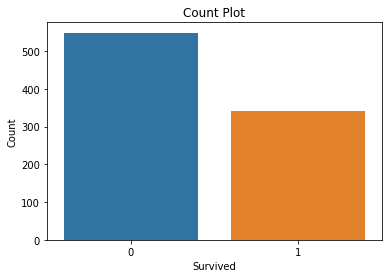

In [15]:
sns.countplot(x = 'Survived', data = titanic)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Count Plot')

Text(0.5, 1.0, 'Count Plot')

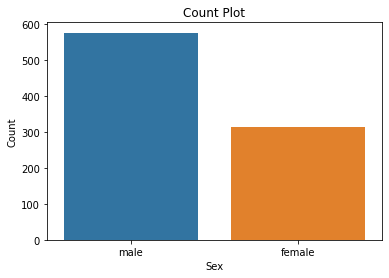

In [16]:
sns.countplot(x = 'Sex', data = titanic)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count Plot')

Text(0.5, 1.0, 'Count Plot')

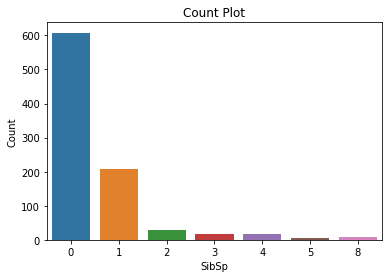

In [17]:
sns.countplot(x = 'SibSp', data = titanic)
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Count Plot')

Text(0.5, 1.0, 'Count Plot')

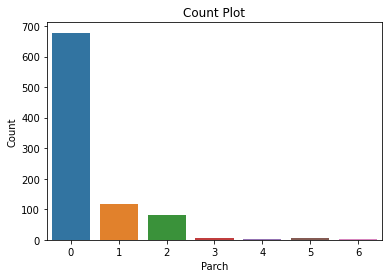

In [18]:
sns.countplot(x = 'Parch', data = titanic)
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Count Plot')

<AxesSubplot:xlabel='count', ylabel='Cabin'>

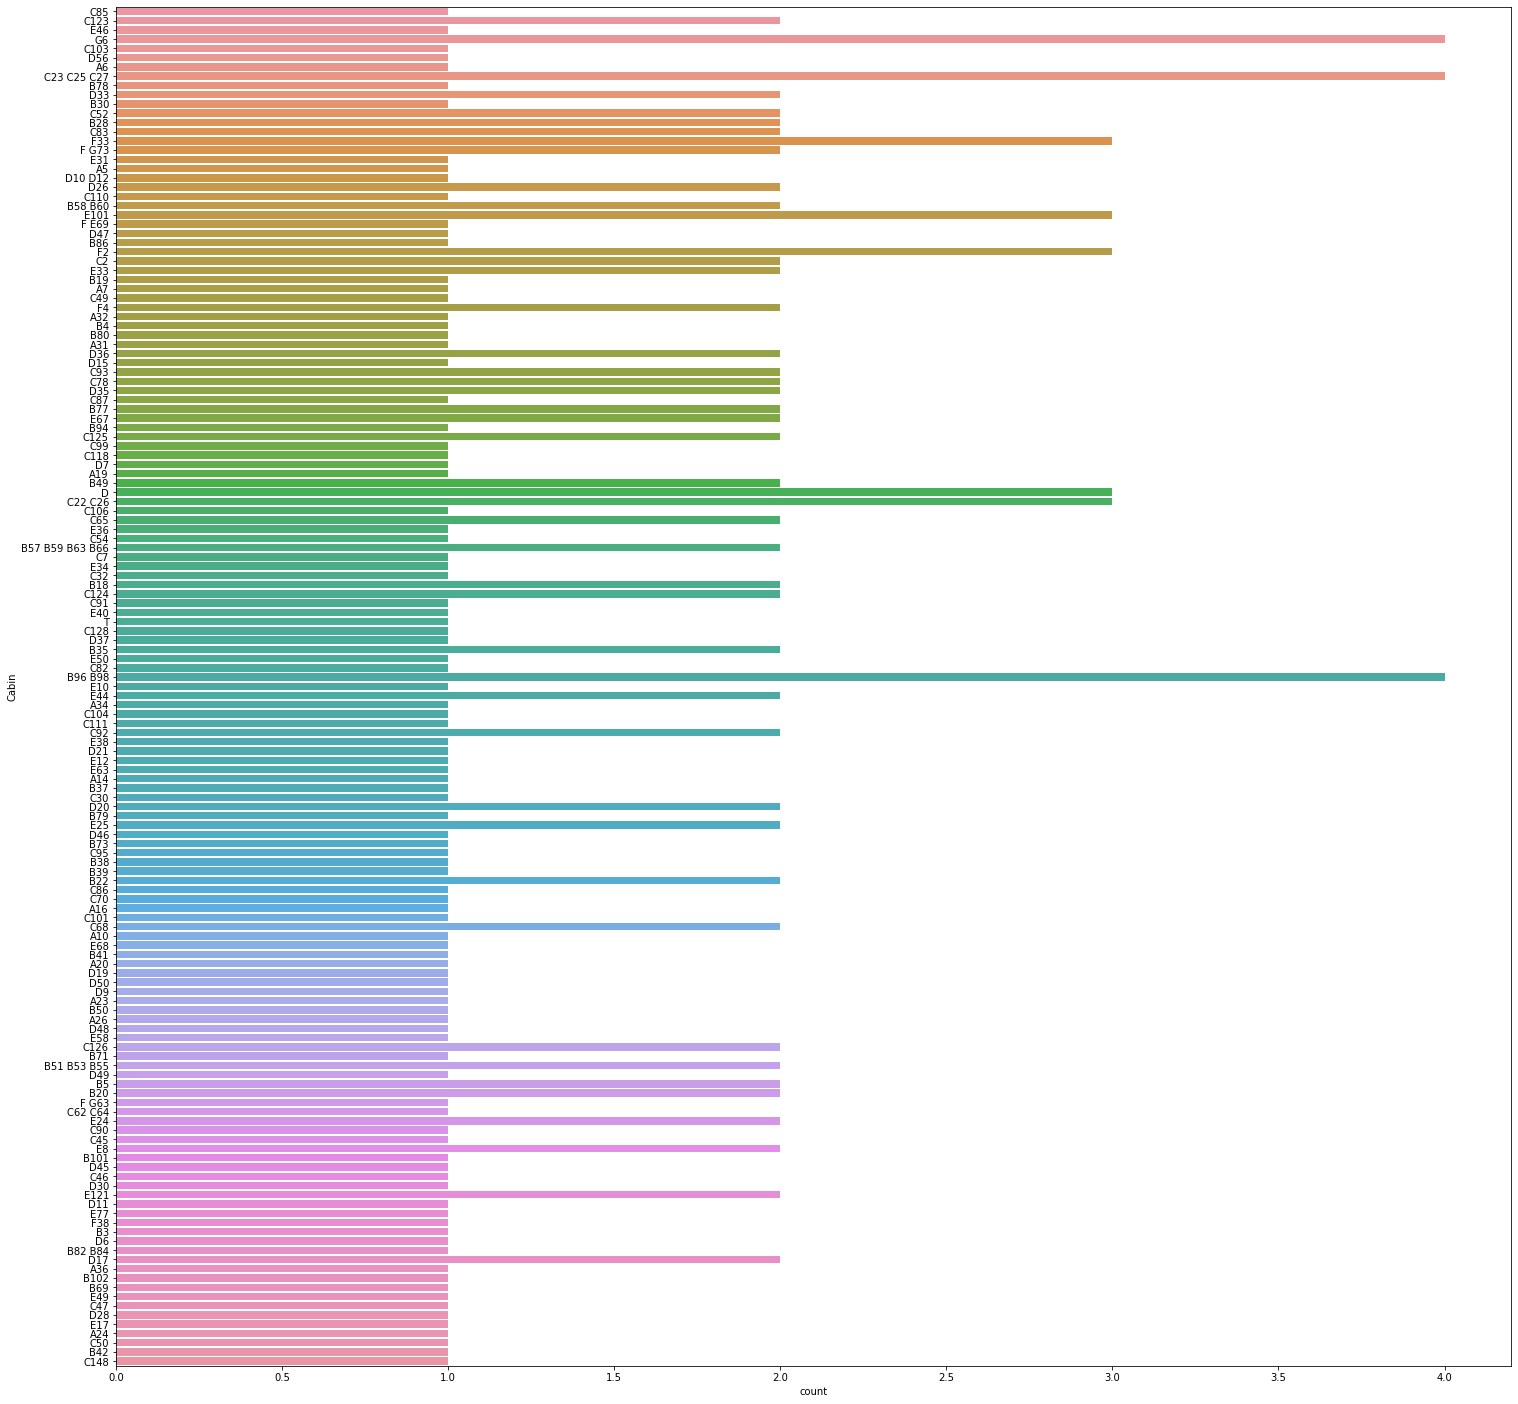

In [19]:
plt.figure(figsize=(25,25))
sns.countplot(y = 'Cabin', data = titanic)

Text(0.5, 1.0, 'Count Plot')

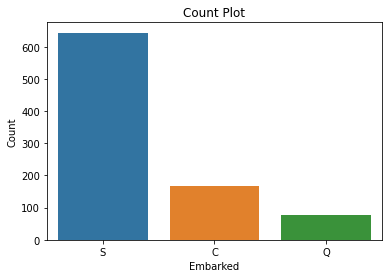

In [20]:
sns.countplot(x = 'Embarked', data = titanic)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Count Plot')

In [21]:
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 0, 'Age')

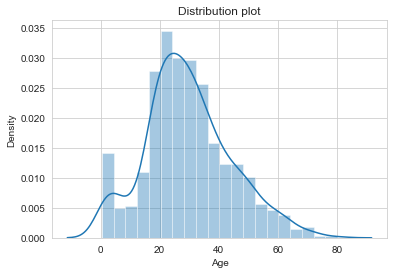

In [22]:
sns.set_style("whitegrid")
sns.distplot(titanic['Age'])
plt.title('Distribution plot')
plt.xlabel('Age')

Text(0.5, 0, 'Fare')

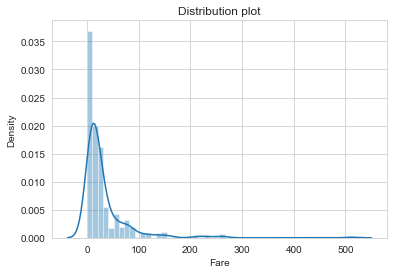

In [23]:
sns.set_style("whitegrid")
sns.distplot(titanic['Fare'])
plt.title('Distribution plot')
plt.xlabel('Fare')

## Bivariate Analysis

Text(0.5, 1.0, 'Count Plot')

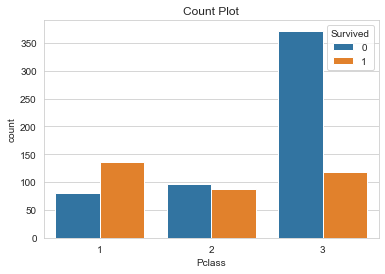

In [24]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic)
plt.title('Count Plot')

## graph split into 0 & 1 by "hue=survived"

Text(0.5, 1.0, 'Count Plot')

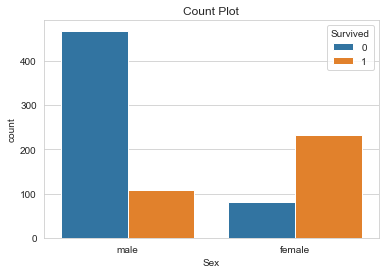

In [25]:
sns.countplot(x = 'Sex', hue = 'Survived' , data = titanic)
plt.title('Count Plot')

Text(0.5, 1.0, 'Count Plot')

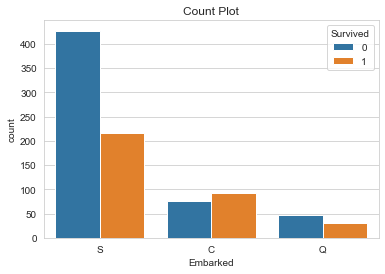

In [26]:
sns.countplot(x = 'Embarked', hue = 'Survived' , data = titanic)
plt.title('Count Plot')

Text(0.5, 1.0, 'Count Plot')

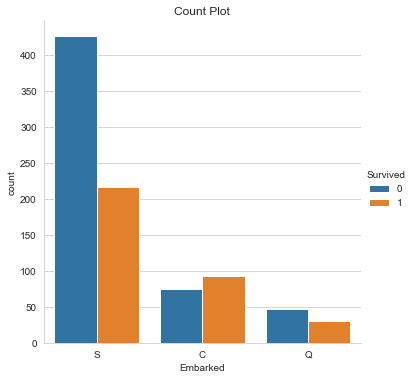

In [27]:
sns.catplot(x = 'Embarked', hue = 'Survived' , data = titanic, kind='count')
plt.title('Count Plot')

Text(0.5, 1.0, 'Scatter Plot')

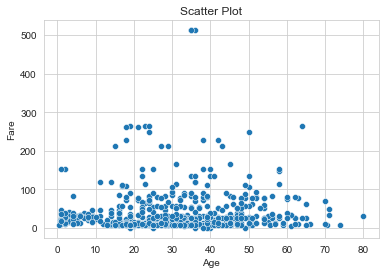

In [28]:
sns.scatterplot(x = 'Age', y = 'Fare', data = titanic)
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

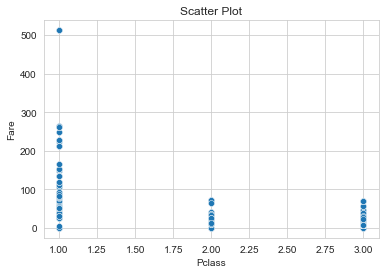

In [29]:
sns.scatterplot(x = 'Pclass', y = 'Fare', data = titanic)
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

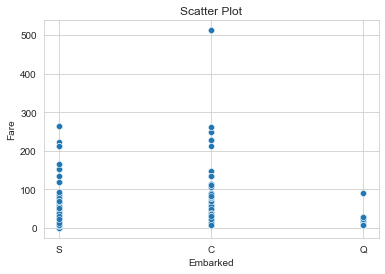

In [30]:
sns.scatterplot(x = 'Embarked', y = 'Fare', data = titanic)
plt.title('Scatter Plot')

## Violin plot

Text(0.5, 1.0, 'Violin Plot')

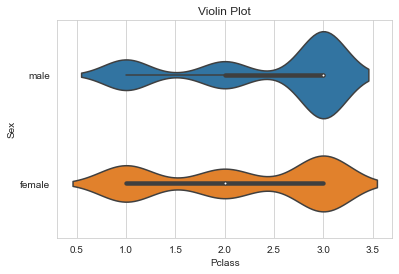

In [31]:
sns.violinplot(x = 'Pclass' , y = 'Sex' , data = titanic)
plt.title('Violin Plot')

## used for both 2 varaible(numerical & catagorical)
## females equally distributed in all class
## males were moslty distributed in 3 class

Text(0.5, 1.0, 'Violin Plot')

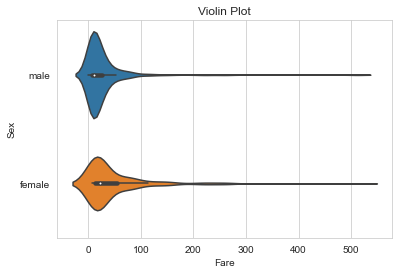

In [32]:
sns.violinplot(x = 'Fare' , y = 'Sex' , data = titanic)
plt.title('Violin Plot')


Text(0.5, 1.0, 'Violin Plot')

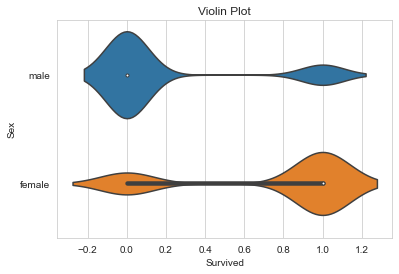

In [33]:
sns.violinplot(x = 'Survived', y = 'Sex' , data = titanic)
plt.title('Violin Plot')


Text(0.5, 1.0, 'Violin Plot')

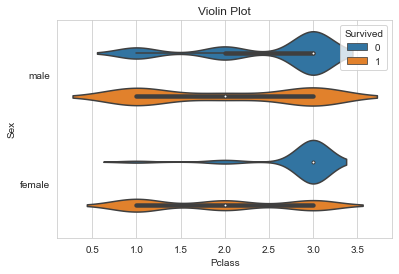

In [34]:
sns.violinplot(x = 'Pclass', y = 'Sex', hue = 'Survived', data = titanic)
plt.title('Violin Plot')


Text(0.5, 1.0, 'Violin Plot')

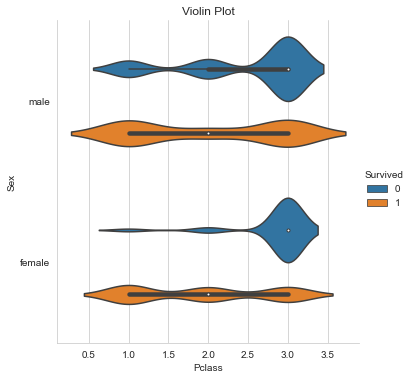

In [35]:
sns.catplot(x = 'Pclass', y = 'Sex', hue = 'Survived', data = titanic, kind='violin')
plt.title('Violin Plot')


## Croostab

In [36]:
pd.crosstab(index = titanic['Sex'], columns = titanic['Survived'])

# tabular represntation

Survived,0,1
Sex,,
female,81,233
male,468,109


In [37]:
# totals

pd.crosstab(index = titanic['Sex'], columns = titanic['Survived'] , margins = True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [38]:
pd.crosstab(index = [titanic['Sex'],titanic['Pclass']],columns = titanic['Survived'])

# for multiple indexs (catageroical data)

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

In [39]:
pd.crosstab(index = [titanic['Sex'],titanic['Pclass']],columns = [titanic['Survived'],titanic['Embarked']], margins=True)

# for multiple index & columns (catageroical data)

Survived        0            1           All
Embarked        C   Q    S   C   Q    S     
Sex    Pclass                               
female 1        1   0    2  42   1   46   92
       2        0   0    6   7   2   61   76
       3        8   9   55  15  24   33  144
male   1       25   1   51  17   0   28  122
       2        8   1   82   2   0   15  108
       3       33  36  231  10   3   34  347
All            75  47  427  93  30  217  889

Text(0.5, 1.0, 'Count Plot')

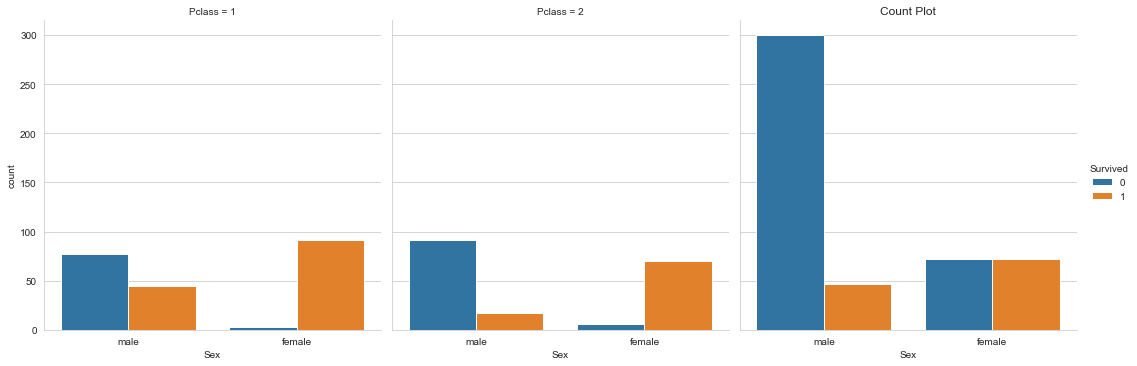

In [40]:
sns.catplot(x='Sex',col='Pclass',hue='Survived',data=titanic,kind='count')
plt.title('Count Plot')


Text(0.5, 1.0, 'Cat Plot')

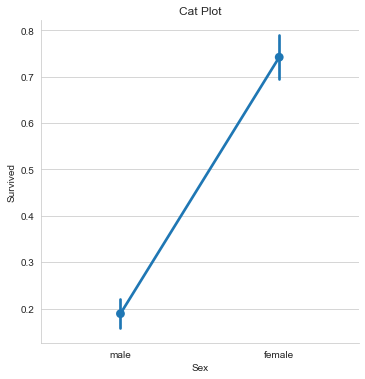

In [41]:
sns.catplot(x = 'Sex', y = 'Survived',data = titanic, kind='point')
plt.title('Cat Plot')

# % or fraction of people surviverd

Text(0.5, 1.0, 'Cat Plot')

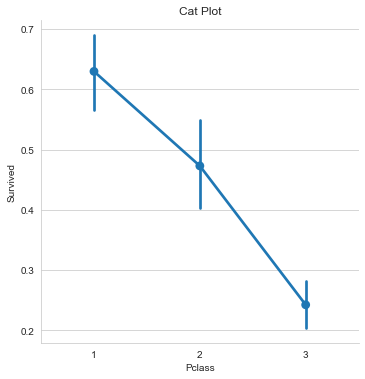

In [42]:
sns.catplot(x = 'Pclass', y = 'Survived',data = titanic ,kind='point')
plt.title('Cat Plot')

# % or fraction of people surviverd

Text(0.5, 1.0, 'Cat Plot')

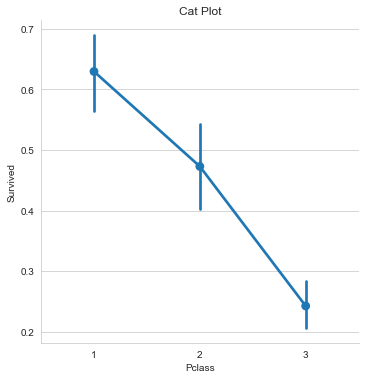

In [43]:
sns.catplot(x='Pclass',y='Survived',data=titanic,kind='point')
plt.title('Cat Plot')


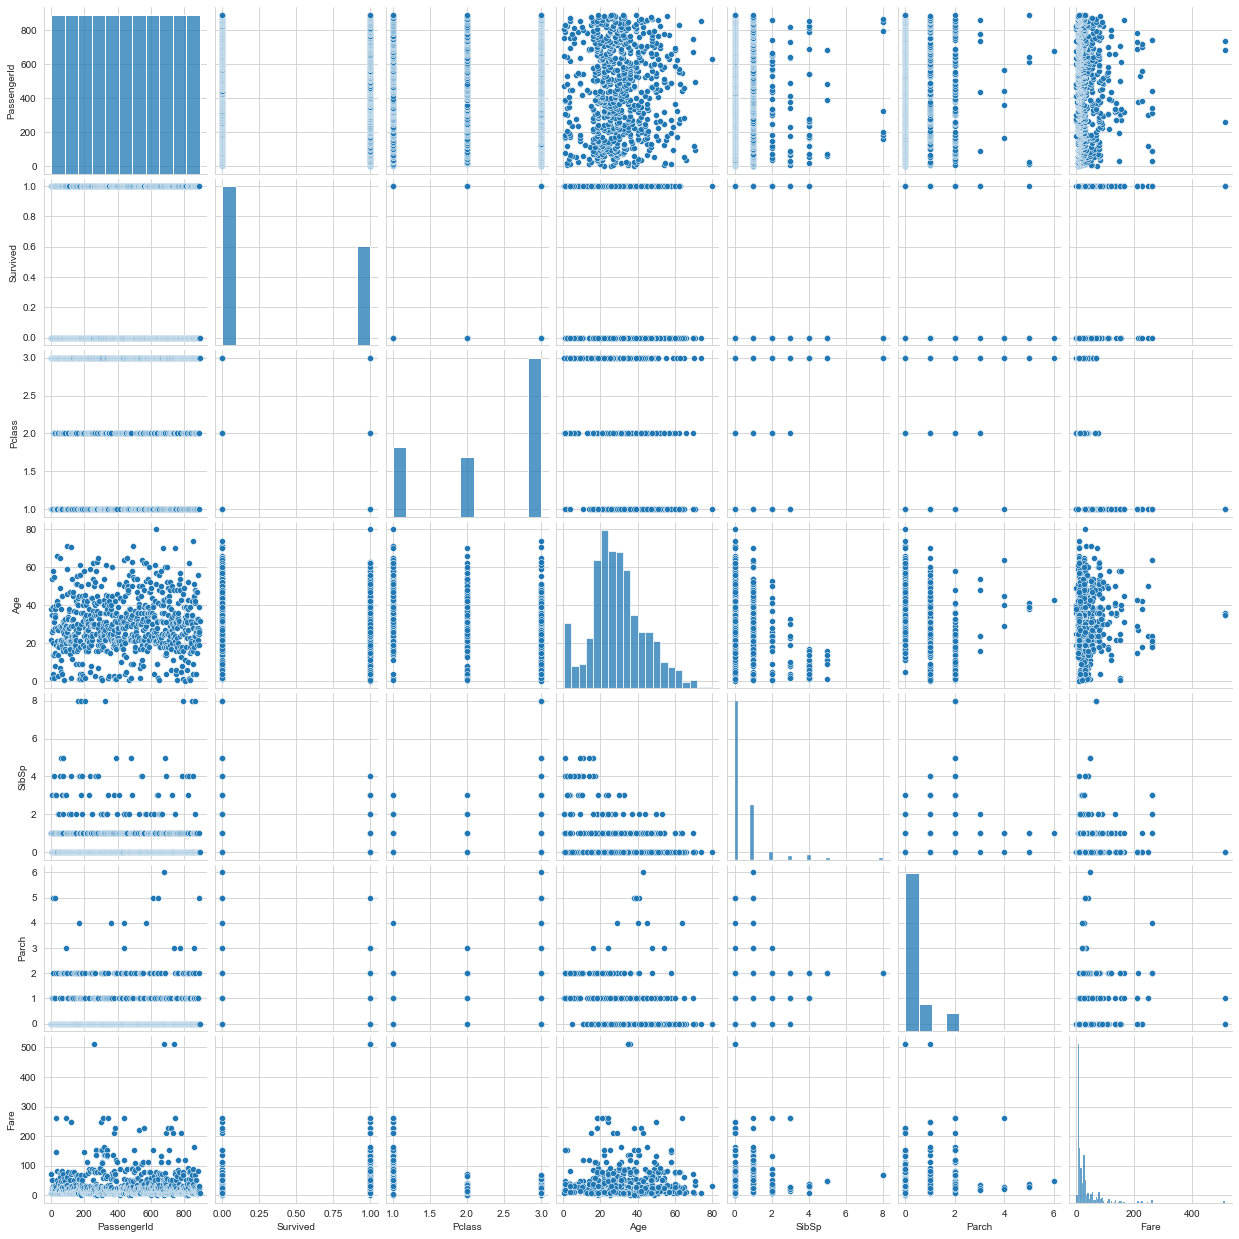

In [44]:
sns.pairplot(titanic)

## Correlation

<AxesSubplot:>

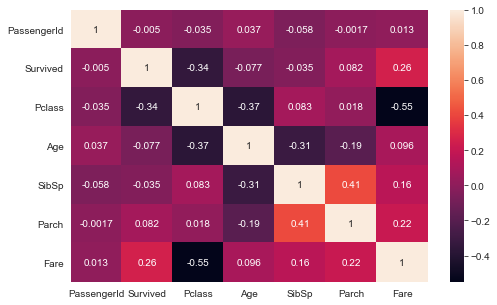

In [45]:
plt.figure(figsize=(8,5))
sns.heatmap(titanic.corr(),annot=True)

## Outlier Detection

Text(0.5, 1.0, 'Box Plot of  Age')

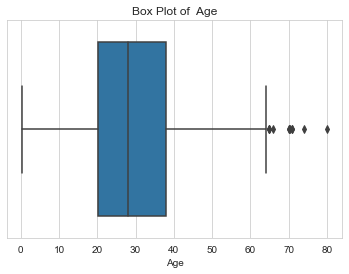

In [46]:
sns.boxplot(x = 'Age', data = titanic)
plt.title('Box Plot of  Age')


Text(0.5, 1.0, 'Box Plot of Fare')

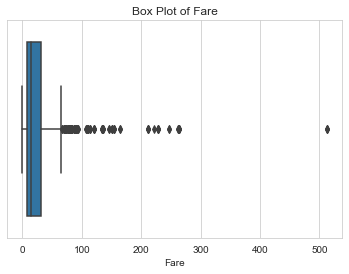

In [47]:
sns.boxplot(x = 'Fare', data = titanic)
plt.title('Box Plot of Fare')

Text(0.5, 1.0, 'Box Plot of SibSp')

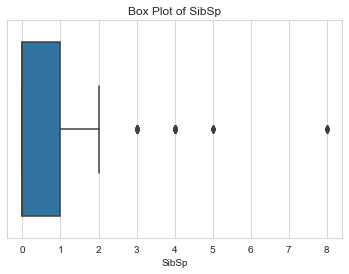

In [48]:
sns.boxplot(x = 'SibSp', data = titanic)
plt.title('Box Plot of SibSp')

Text(0.5, 1.0, 'Box Plot of Parch')

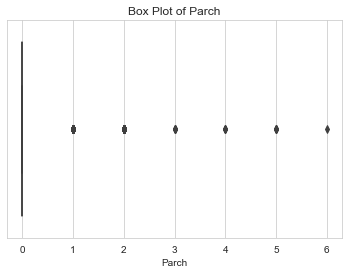

In [49]:
sns.boxplot(x = 'Parch', data = titanic)
plt.title('Box Plot of Parch')

## Handling Missing value

### 1. Embarked

In [50]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [51]:
titanic['Embarked'].fillna('S', inplace = True)

### 2. Age

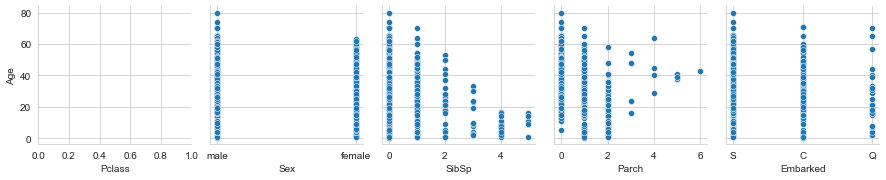

In [52]:
sns.pairplot(x_vars=['Pclass','Sex','SibSp','Parch','Embarked'], y_vars='Age',data = titanic)

#### Grouping the data "SibSp" and "Age"

In [53]:
titanic.groupby('SibSp')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,471.0,31.397558,13.647767,0.42,22.00,29.0,39.00,80.0
1,183.0,30.089727,14.645033,0.67,20.00,30.0,39.00,70.0
2,25.0,22.620000,14.679230,0.75,16.00,23.0,28.00,53.0
3,12.0,13.916667,11.317391,2.00,3.75,9.5,23.25,33.0
4,18.0,7.055556,4.880601,1.00,3.25,6.5,9.00,17.0
5,5.0,10.200000,5.805170,1.00,9.00,11.0,14.00,16.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Count Plot for SibSp where Age have null value')

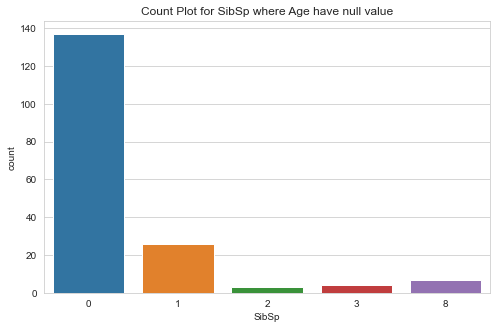

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x='SibSp',data = titanic[titanic['Age'].isnull()])
plt.xlabel('SibSp')
plt.title('Count Plot for SibSp where Age have null value')

In [55]:
titanic['Age'].mean()

29.69911764705882

In [56]:
titanic['Age'].median()

28.0

In [57]:
titanic['Age']=np.where((titanic['SibSp']==8) & (titanic['Age'].isnull()),28.0,titanic['Age'])

titanic['Age']=np.where((titanic['SibSp']==3) & (titanic['Age'].isnull()),9.5,titanic['Age'])

titanic['Age']=np.where((titanic['SibSp']==2) & (titanic['Age'].isnull()),23.0,titanic['Age'])

titanic['Age']=np.where((titanic['SibSp']==1) & (titanic['Age'].isnull()),30.0,titanic['Age'])

titanic['Age']=np.where((titanic['SibSp']==0) & (titanic['Age'].isnull()),29.0,titanic['Age'])

In [58]:
titanic['Age'].isnull().sum()

0

## Handling Outliers

<AxesSubplot:xlabel='Fare'>

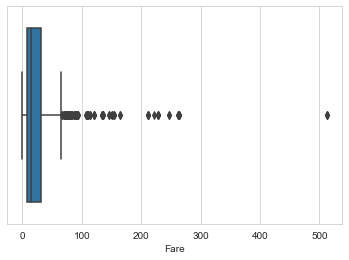

In [59]:
sns.boxplot(x = 'Fare', data = titanic)

In [60]:
titanic[titanic['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [61]:
titanic.drop(titanic[titanic['Fare']>300].index, inplace = True)

## Removing some columns that we are not going to use for our model.

In [62]:
titanic.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

In [63]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64